In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import zipfile
import os
import pandas as pd

extraction_dir = '/kaggle/input/movie-classifier/Multi_Label_dataset'

csv_path = os.path.join(extraction_dir, 'train.csv')

df = pd.read_csv(csv_path)

df

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,tt2409818,"['Action', 'Crime', 'Thriller']",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7250,tt2062622,"['Animation', 'Comedy', 'Family']",0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7251,tt2442502,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7252,tt3455850,['Documentary'],0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
labels_names = df.drop(['Id', 'Genre'], axis = 1).columns
labels_names

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [3]:
image_names = df['Id']
image_names

multi_hot_encoding = df.drop(['Genre'], axis=1).set_index('Id').T.to_dict(orient = 'list')


/tmp/ipykernel_34/1711675911.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  multi_hot_encoding = df.drop(['Genre'], axis=1).set_index('Id').T.to_dict(orient = 'list')


In [ ]:
import cv2
import numpy as np

images_dict = {}
for image_name in image_names:
    image_path = os.path.join(extraction_dir,'Images', image_name + '.jpg')
    img = cv2.imread(image_path)
    img = cv2.resize(img, (475, 300))
    images_dict[image_name] = img

In [ ]:
#multi_hot_encoding

In [37]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input,Dropout

images = np.array([images_dict[image_name] for image_name in image_names[:500]])
labels = np.array([multi_hot_encoding[image_name] for image_name in image_names[:500]])

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential([
    Input(shape=(300, 475, 3)),
    Conv2D(31, (5, 5), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Conv2D(64, (5, 5), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Conv2D(128, (5, 5), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Conv2D(256, (5, 5), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Conv2D(512, (5, 5), activation='relu'),
    Dropout(0.2),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(labels[0]), activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])
model.optimizer.learning_rate.assign(0.01)



In [38]:
print(X_test[0].shape)
model.summary()

(300, 475, 3)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 296, 471, 31)   │         2,356 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 296, 471, 31)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 148, 235, 31)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 144, 231, 64)   │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 144, 231, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 72, 115, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 68, 111, 128)   │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 68, 111, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 34, 55, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 30, 51, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 30, 51, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 15, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 11, 21, 512)    │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 11, 21, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 5, 10, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │    13,107,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,628,877 (67.25 MB)

 Trainable params: 17,628,877 (67.25 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10


W0000 00:00:1720022370.649844    1974 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 113s 6s/step - accuracy: 0.1288 - loss: 28816.6582 - top_k_categorical_accuracy: 0.4449
Epoch 2/10


W0000 00:00:1720022407.256248    1975 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.2075 - loss: 0.5978 - top_k_categorical_accuracy: 0.5593
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.0992 - loss: 0.3471 - top_k_categorical_accuracy: 0.5883
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.2344 - loss: 0.2870 - top_k_categorical_accuracy: 0.6846
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.3038 - loss: 0.2708 - top_k_categorical_accuracy: 0.7838
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 330ms/step - accuracy: 0.1966 - loss: 0.2600 - top_k_categorical_accuracy: 0.7503
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 330ms/step - accuracy: 0.2493 - loss: 0.2528 - top_k_categorical_accuracy: 0.7518
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - accuracy: 0.2892 - loss: 0.2515 - top_k_categorical_accuracy: 0.7736
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.2512 - loss: 0.2530 - top_k_categorical_accuracy: 0.7791
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 332

In [11]:
loss, accuracy, top5 = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

predictions = model.predict(X_test)

2/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.2734 - loss: 0.2351 - top_k_categorical_accuracy: 0.8359

W0000 00:00:1720020053.227609    1975 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 54s 3s/step - accuracy: 0.2533 - loss: 0.2359 - top_k_categorical_accuracy: 0.8330


W0000 00:00:1720020061.781896    1974 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


ValueError: too many values to unpack (expected 2)

In [121]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import tensorflow as tf

ResNet50_model = ResNet50(weights='imagenet', input_shape=(300, 475, 3), include_top=False)

x = ResNet50_model.output
x = tf.keras.layers.Flatten()(x)
predictions = tf.keras.layers.Dense(25, activation='sigmoid')(x)
TL_model = Model(inputs = ResNet50_model.input, outputs = predictions)

TL_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy', 'top_k_categorical_accuracy'])


In [23]:
for layer in ResNet50_model.layers:
    layer.trainable = False

In [122]:
TL_model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100



KeyboardInterrupt



In [15]:
loss, accuracy, top5 = TL_model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
print('Test Top5 Accuracy:', top5)

predictions_TL = TL_model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.3813 - loss: 0.5048 - top_k_categorical_accuracy: 0.8207
Test Loss: 0.49264058470726013
Test Accuracy: 0.3700000047683716
Test Top5 Accuracy: 0.8199999928474426
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 487ms/step


In [2]:
fully_connected = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(128, activation = 'relu'),
    Dense(len(labels[0]), activation='sigmoid') 
])(x)

dense_model = Model(inputs = ResNet50_model.input, outputs = fully_connected)

dense_model.compile(optimizer='adam',loss = 'binary_crossentropy', metrics=['accuracy','top_k_categorical_accuracy'])

NameError: name 'Sequential' is not defined

In [1]:
dense_model.fit(X_train, y_train, epochs=100, batch_size=64)

NameError: name 'dense_model' is not defined

In [117]:
loss, accuracy , top5 = dense_model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)
print('Test Top5 Accuracy:', top5)

predictions_dense = dense_model.predict(X_test)

W0000 00:00:1720025291.070792    1975 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 903ms/step - accuracy: 0.3445 - loss: 0.3787 - top_k_categorical_accuracy: 0.7503
Test Loss: 0.37556371092796326
Test Accuracy: 0.33000001311302185
Test Top5 Accuracy: 0.7300000190734863
1/4 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step

W0000 00:00:1720025298.300292    1974 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step  


In [112]:
def GenrePrediction(predictions):

    predictions = np.array(predictions)

    top_indices = np.argsort(predictions)[0][-3:]
    top_values = predictions[0][top_indices]


    diff1 = np.abs(top_values[0] - top_values[1])
    diff2 = np.abs(top_values[1] - top_values[2])
    
    classification = []

    threshold = np.std(predictions)
   
    if diff1 > threshold:
        print(top_values[2])
        classification.append(labels_namess[top_indices[2]])
    elif diff1 <= threshold and diff2 > threshold:
        print(top_values[2])
        print(top_values[1])
        classification.append(labels_names[top_indices[2]])
        classification.append(labels_names[top_indices[1]])
    else:
        print(top_values[2])
        print(top_values[1])
        print(top_values[0])
        classification.append(labels_names[top_indices[2]])
        classification.append(labels_names[top_indices[1]])
        classification.append(labels_names[top_indices[0]])

    return classification



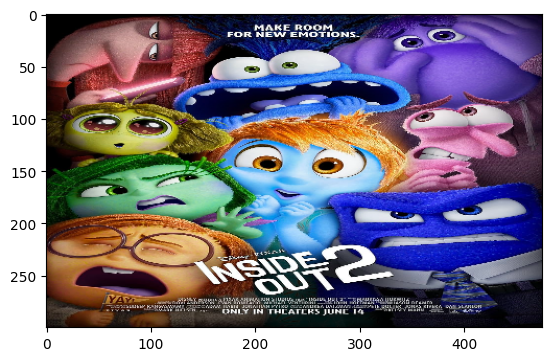

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


prediction_imgs = {}
for image_name in ['inside_out_2', 'paddington']:
    image_path = os.path.join('/kaggle/input/predictionimages', image_name + '.jpg')
    img = cv2.imread(image_path)
    img = cv2.resize(img, (475, 300))
    prediction_imgs[image_name] = img
    

plt.imshow(prediction_imgs['inside_out_2'])
prediction_imgs['inside_out_2'] = np.expand_dims(prediction_imgs['inside_out_2'], axis =0)
prediction_imgs['paddington'] = np.expand_dims(prediction_imgs['paddington'], axis =0)

In [120]:


inside_out = dense_model.predict(prediction_imgs['paddington'])

IO2_Genre = GenrePrediction(inside_out)
IO2_Genre

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.0
0.1912591


['Drama', 'Music']